In [15]:
import os

pontos_centrais_cidades ={'alfenas': (-21.420327, -45.948580),
                         'itabira': (-19.644693, -43.228580),
                         'itajuba': (-22.426959, -45.463703),
                         'joaomonlevade': (-19.820029, -43.154901),
                         'lavras': (-21.244698, -44.996468),
                         'ouropreto': (-20.391875, -43.502574),
                         'saojoao': (-21.123135, -44.245778),
                         'vicosa': (-20.748481, -42.878345)
                        }
cidade = 'vicosa'
caminho_arquivos_cidade = os.getcwd() + '\\base-dados\\' + cidade
caminho_medidas_refinadas = caminho_arquivos_cidade + '\\' + cidade + '_medidas_refinadas.csv'
caminho_grafo = caminho_arquivos_cidade + '\\' + cidade + '.graphml'
caminho_dados_policia = os.getcwd() + '\\dados_cidades_projeto\\DadosRefinados_' + cidade + '.csv'

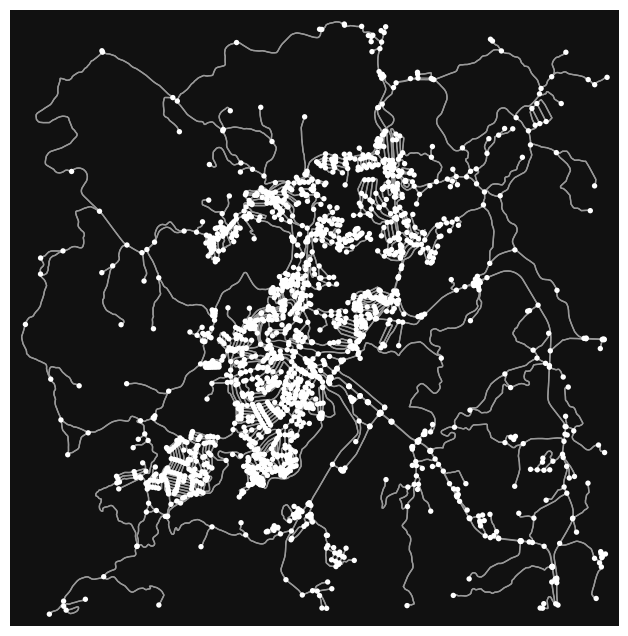

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [16]:
import osmnx as ox
import os

G = ox.load_graphml(caminho_grafo)
ox.plot_graph(G)

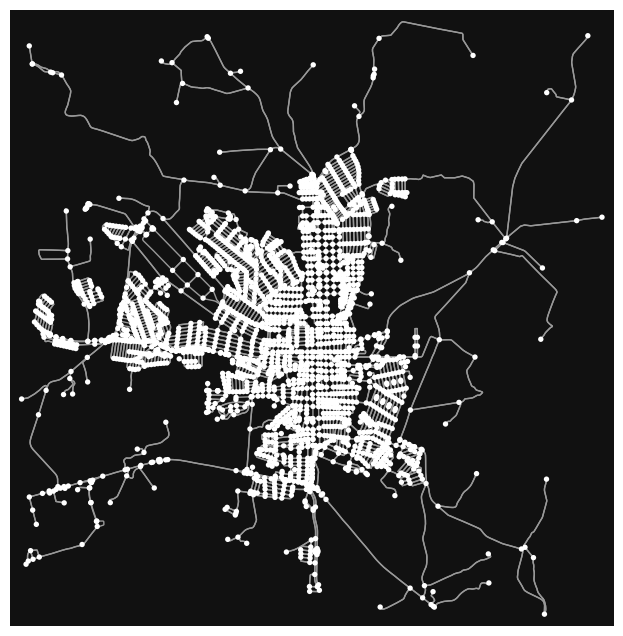

In [2]:
#recuperando o grafo a partir do ponto central de cada cidade

#Viçosa: -20.748481, -42.878345
#Lavras: -21.244698, -44.996468
#Alfenas: -21.420327, -45.948580
#Itabira: -19.644693, -43.228580
#Itajubá: -22.426959, -45.463703
#Ouro Preto: -20.391875, -43.502574
#João Monlevade: -19.820029, -43.154901
#São João Del Rei: -21.123135, -44.245778


import osmnx as ox
import os

G = ox.graph.graph_from_point(pontos_centrais_cidades[cidade], dist=5000, network_type="drive")
ox.plot_graph(G)

if not os.path.exists(caminho_arquivos_cidade):
    os.makedirs(caminho_arquivos_cidade)
    
ox.save_graphml(G, caminho_grafo)

In [17]:
#calculando a métrica da estrutura urbana de cada cidade e armazendando em csv
# GRAFO MÉTRICAS

import networkx as nx
import pandas as pd
import osmnx as ox

G = ox.load_graphml(caminho_grafo)
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='old_index')
D = ox.utils_graph.get_digraph(G)

bc = nx.betweenness_centrality(D)
cc = nx.closeness_centrality(D)
dc = nx.degree_centrality(D)
ec = nx.eigenvector_centrality(D, max_iter=600)
pc = nx.pagerank(D, max_iter=600)

cols = ['closeness_centrality']
df = pd.DataFrame.from_dict(cc, orient='index', columns=cols)
df['betweenes_centrality'] = bc.values()
df['degree_centrality'] = dc.values()
df['eigenvector_centrality'] = ec.values()
df['pagerank_centrality'] = pc.values()

caminho_medidas = caminho_arquivos_cidade + '\\' + cidade + '_medidas.csv'
df.to_csv(caminho_medidas)

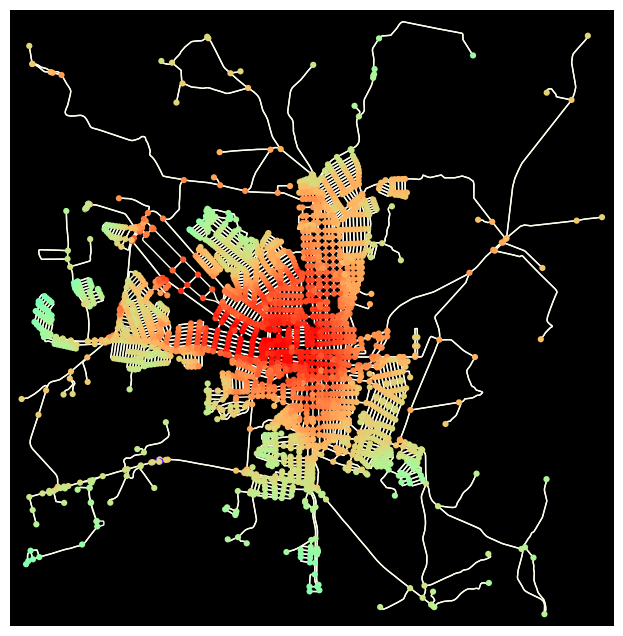

In [7]:
#visualização do grafo da cidade com a métrica escolhida como mapa de calor

import networkx as nx
import osmnx as ox

G = ox.load_graphml(caminho_grafo)
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='old_index')
#nx.set_node_attributes(G, values=bc, name='betweenness')
nx.set_node_attributes(G, values=cc, name='closeness')
#nx.set_node_attributes(G, values=dc, name='degree')
#nx.set_node_attributes(G, values=ec, name='eigenvector')
#nx.set_node_attributes(G, values=pc, name='page')

#cores_betweenness = ox.plot.get_node_colors_by_attr(G, "betweenness", cmap="jet")
cores_closeness = ox.plot.get_node_colors_by_attr(G, "closeness", cmap="rainbow")
#cores_degree = ox.plot.get_node_colors_by_attr(G, "degree", cmap="jet")
#cores_eigenvector = ox.plot.get_node_colors_by_attr(G, "eigenvector", cmap="jet")
#cores_page = ox.plot.get_node_colors_by_attr(G, "page", cmap="rainbow")

fig, ax = ox.plot.plot_graph(
    G, bgcolor="k", node_color=cores_closeness, node_size=20, edge_linewidth=1, edge_color="#ffffee"
)

In [ ]:
#verificar
nx.write_gexf(D, caminho_arquivos_cidade + '\\' + cidade + '_closeness.gexf')

In [11]:
#calculando a quantidade de ocorrências registradas em cada cruzamento da cidade
# GRAFO OCORRENCIAS

import osmnx as ox
import networkx as nx
import pandas as pd
import haversine as hs

G = ox.load_graphml(caminho_arquivos_cidade + '\\' + cidade + '.graphml')
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='old_index')

df = pd.read_csv(caminho_dados_policia)
dadoscalculados = pd.read_csv(caminho_medidas)
nr_nodes = nx.number_of_nodes(G)

ocorrencias = {i: 0 for i in range(nr_nodes)}

for index, row in df.iterrows():
    max_dist = float('inf')
    cruzamento_selecionado = None;
    local_ocorrencia = (row['Latitude'], row['Longitude'])
    
    for u, data in G.nodes(data=True):
        local_cruzamento = (data['y'], data['x'])
        dist = hs.haversine(local_ocorrencia, local_cruzamento, unit=hs.Unit.METERS)
        if(dist < max_dist):
            max_dist = dist
            cruzamento_selecionado = u
    
    if cruzamento_selecionado is not None:
        ocorrencias[cruzamento_selecionado] += 1

dadoscalculados['quantidade_ocorrencia'] = ocorrencias.values()
dadoscalculados.to_csv(caminho_medidas, index=False);

{0: 1,
 1: 5,
 2: 0,
 3: 2,
 4: 3,
 5: 3,
 6: 1,
 7: 1,
 8: 0,
 9: 4,
 10: 1,
 11: 1,
 12: 9,
 13: 0,
 14: 2,
 15: 0,
 16: 1,
 17: 0,
 18: 2,
 19: 0,
 20: 2,
 21: 0,
 22: 0,
 23: 0,
 24: 1,
 25: 0,
 26: 1,
 27: 0,
 28: 1,
 29: 1,
 30: 0,
 31: 1,
 32: 2,
 33: 3,
 34: 2,
 35: 2,
 36: 2,
 37: 0,
 38: 2,
 39: 9,
 40: 3,
 41: 0,
 42: 4,
 43: 1,
 44: 1,
 45: 2,
 46: 4,
 47: 1,
 48: 0,
 49: 2,
 50: 1,
 51: 2,
 52: 2,
 53: 1,
 54: 1,
 55: 0,
 56: 4,
 57: 6,
 58: 1,
 59: 3,
 60: 4,
 61: 0,
 62: 1,
 63: 2,
 64: 3,
 65: 1,
 66: 1,
 67: 1,
 68: 2,
 69: 1,
 70: 0,
 71: 1,
 72: 0,
 73: 0,
 74: 1,
 75: 3,
 76: 0,
 77: 2,
 78: 0,
 79: 5,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 4,
 85: 0,
 86: 0,
 87: 1,
 88: 0,
 89: 1,
 90: 0,
 91: 1,
 92: 1,
 93: 0,
 94: 3,
 95: 2,
 96: 0,
 97: 6,
 98: 0,
 99: 0,
 100: 1,
 101: 1,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 2,
 114: 0,
 115: 2,
 116: 5,
 117: 0,
 118: 3,
 119: 1,
 120: 3,
 121: 4,
 122: 0,
 12

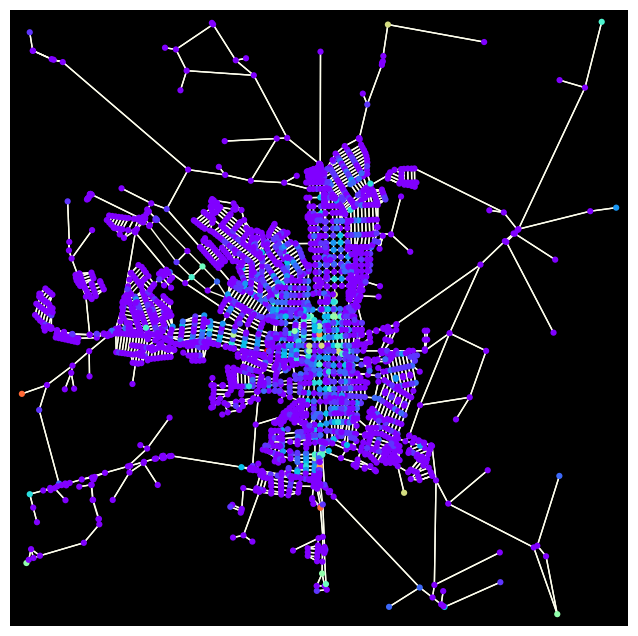

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [17]:
#visualização do GRAFO DE OCORRÊNCIAS como mapa de calor

import osmnx as ox
import networkx as nx
import pandas as pd

G = ox.load_graphml(caminho_arquivos_cidade + '\\' + cidade + '.graphml')
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='old_index')
df = pd.read_csv(caminho_medidas)
ocorrencias = df['quantidade_ocorrencia'].to_dict()

nx.set_node_attributes(G, ocorrencias, name="nr_ocorrencias")
cores_ocorrencias = ox.plot.get_node_colors_by_attr(G, "nr_ocorrencias", cmap="rainbow")

for u, v, data in G.edges.data():
    data.clear()

ox.plot.plot_graph(
   G, bgcolor="k", node_color=cores_ocorrencias, node_size=20, edge_linewidth=1, edge_color="#ffffee"
)

In [ ]:
# Armazenando arquivo gexf para o grafo de ocorrências (Visualização no GEPHI)

nx.write_gexf(G, "/home/matheus_flausino/Documents/mestrado/Projeto/projeto/base-dados/gephi/vicosa.gexf")

In [19]:
#calculo da distancia para a universidade federal

import osmnx as ox
import networkx as nx
import pandas as pd
import haversine as hs

G = ox.load_graphml(caminho_grafo)
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='old_index')

localizacao_universidades = {
                            'alfenas': (-21.420734139812197, -45.94857609208687),
                            'itabira':(-19.673061652058852, -43.212421534406204),
                            'itajuba':(-22.421057250613636, -45.460112158690066),
                            'joao_monlevade': (-19.8359317141204, -43.16770629585404),                            
                            'lavras': (-21.230714620911264, -44.994126378125785),
                            'ouro_preto': (-20.395772569014458, -43.51068671213827),
                            'sao_joao_del_rei': (-21.13959592057899, -44.26047341001594),
                            'vicosa': (-20.760802504862596, -42.870214344859825)
                            }

localizacao_universidade = localizacao_universidades[cidade]
distancias = {i: 0 for i in range(nx.number_of_nodes(G))}

for u, data in G.nodes(data=True):
    local_cruzamento = (data['y'], data['x'])
    dist = hs.haversine(localizacao_universidade, local_cruzamento, unit=hs.Unit.METERS)
    distancias[u] = dist

dadoscalculados = pd.read_csv(caminho_medidas)
dadoscalculados['distancia_universidade'] = distancias.values()
dadoscalculados.to_csv(caminho_medidas, index=False);

In [20]:
#registrando latitude e longitude de cada cruzamento na planilha
import osmnx as ox
import networkx as nx
import pandas as pd

G = ox.load_graphml(caminho_grafo)
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='old_index')

pontos = {i: 0 for i in range(nx.number_of_nodes(G))}

for u, data in G.nodes(data=True):
    local_cruzamento = (data['y'], data['x'])
    pontos[u] = local_cruzamento

dadoscalculados = pd.read_csv(caminho_medidas)
dadoscalculados['latitude e longitude'] = pontos.values()
dadoscalculados.to_csv(caminho_medidas, index=False);

In [36]:
#removendo colunas indesejadas para visualização / cálculo
import pandas as pd

dadoscalculados = pd.read_csv(caminho_medidas)
dadoscalculados = dadoscalculados.drop('latitude e longitude', axis=1)
dadoscalculados = dadoscalculados.drop('Unnamed: 0', axis=1)
dadoscalculados.describe(include='all').round(6)

<Axes: xlabel='distancia_universidade', ylabel='quantidade_ocorrencia'>

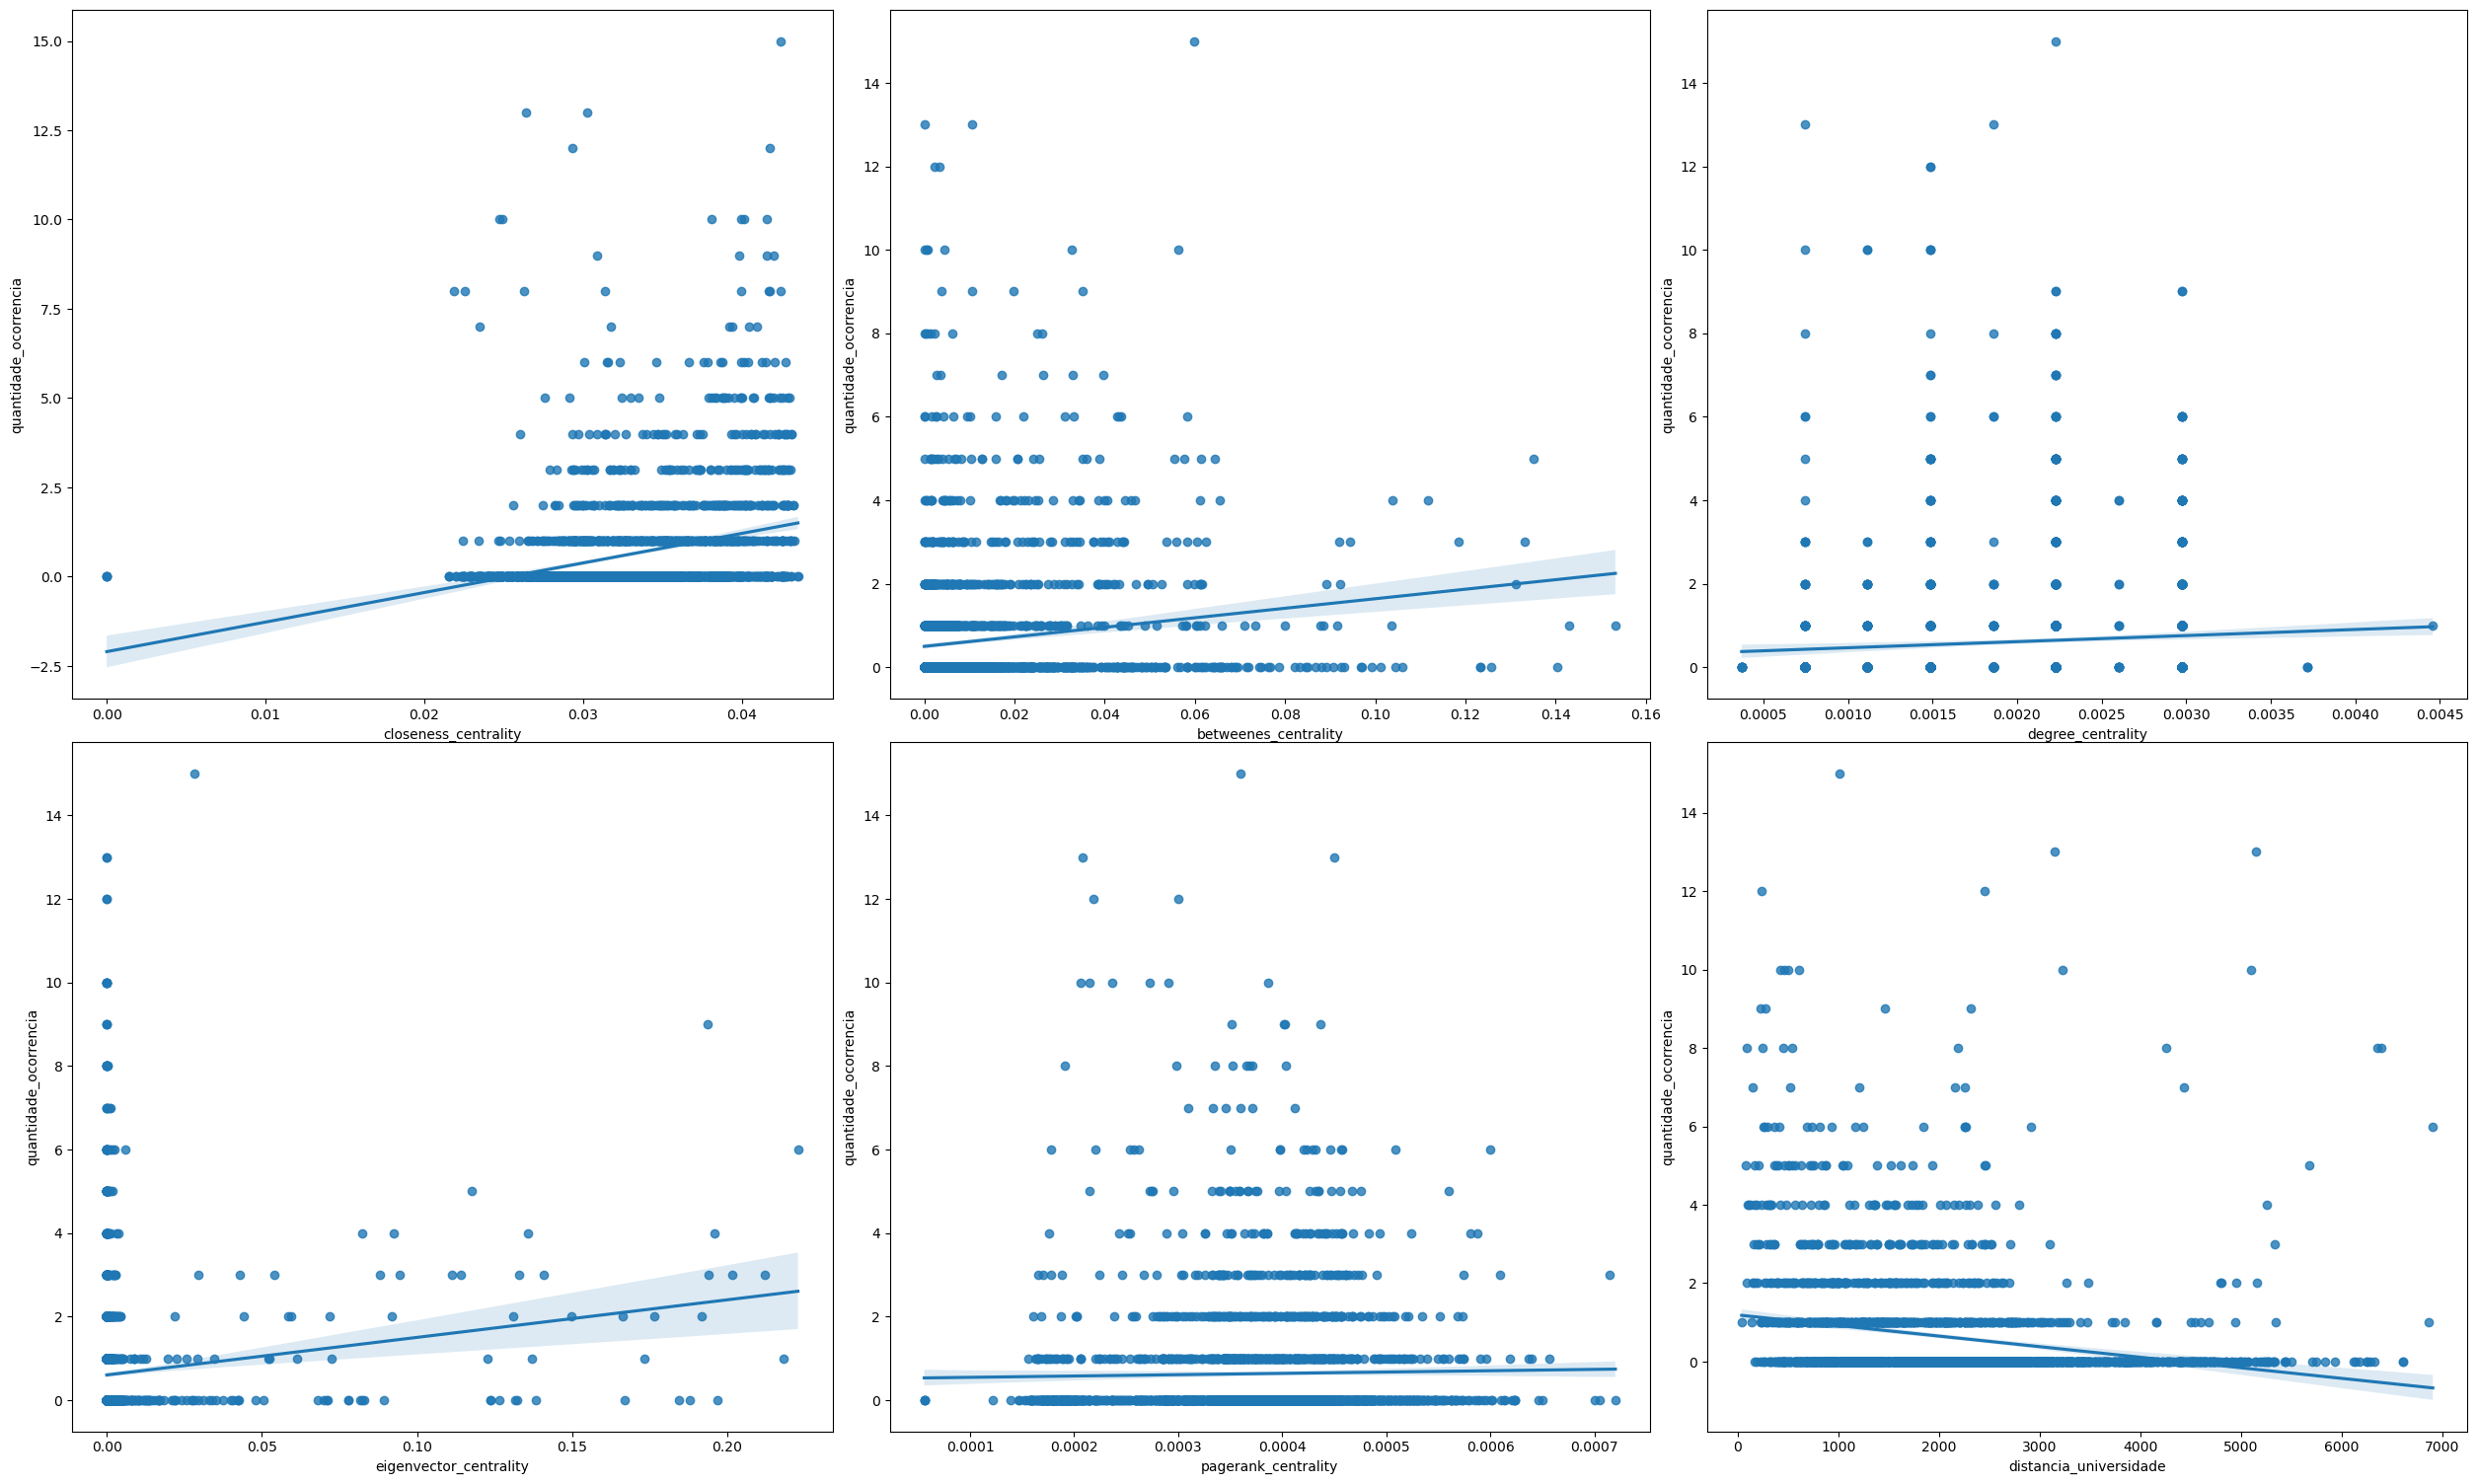

In [21]:
#visualização inicial utilizando seaborn

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

dadoscalculados = pd.read_csv(caminho_medidas)
janela, graficos = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
plt.tight_layout()

sns.regplot(data=dadoscalculados, x="closeness_centrality", y="quantidade_ocorrencia", ax=graficos[0][0])
sns.regplot(data=dadoscalculados, x="betweenes_centrality", y="quantidade_ocorrencia", ax=graficos[0][1])
sns.regplot(data=dadoscalculados, x="degree_centrality", y="quantidade_ocorrencia", ax=graficos[0][2])
sns.regplot(data=dadoscalculados, x="eigenvector_centrality", y="quantidade_ocorrencia", ax=graficos[1][0])
sns.regplot(data=dadoscalculados, x="pagerank_centrality", y="quantidade_ocorrencia", ax=graficos[1][1])
sns.regplot(data=dadoscalculados, x="distancia_universidade", y="quantidade_ocorrencia", ax=graficos[1][2])

<Axes: xlabel='distancia_universidade', ylabel='quantidade_ocorrencia_2'>

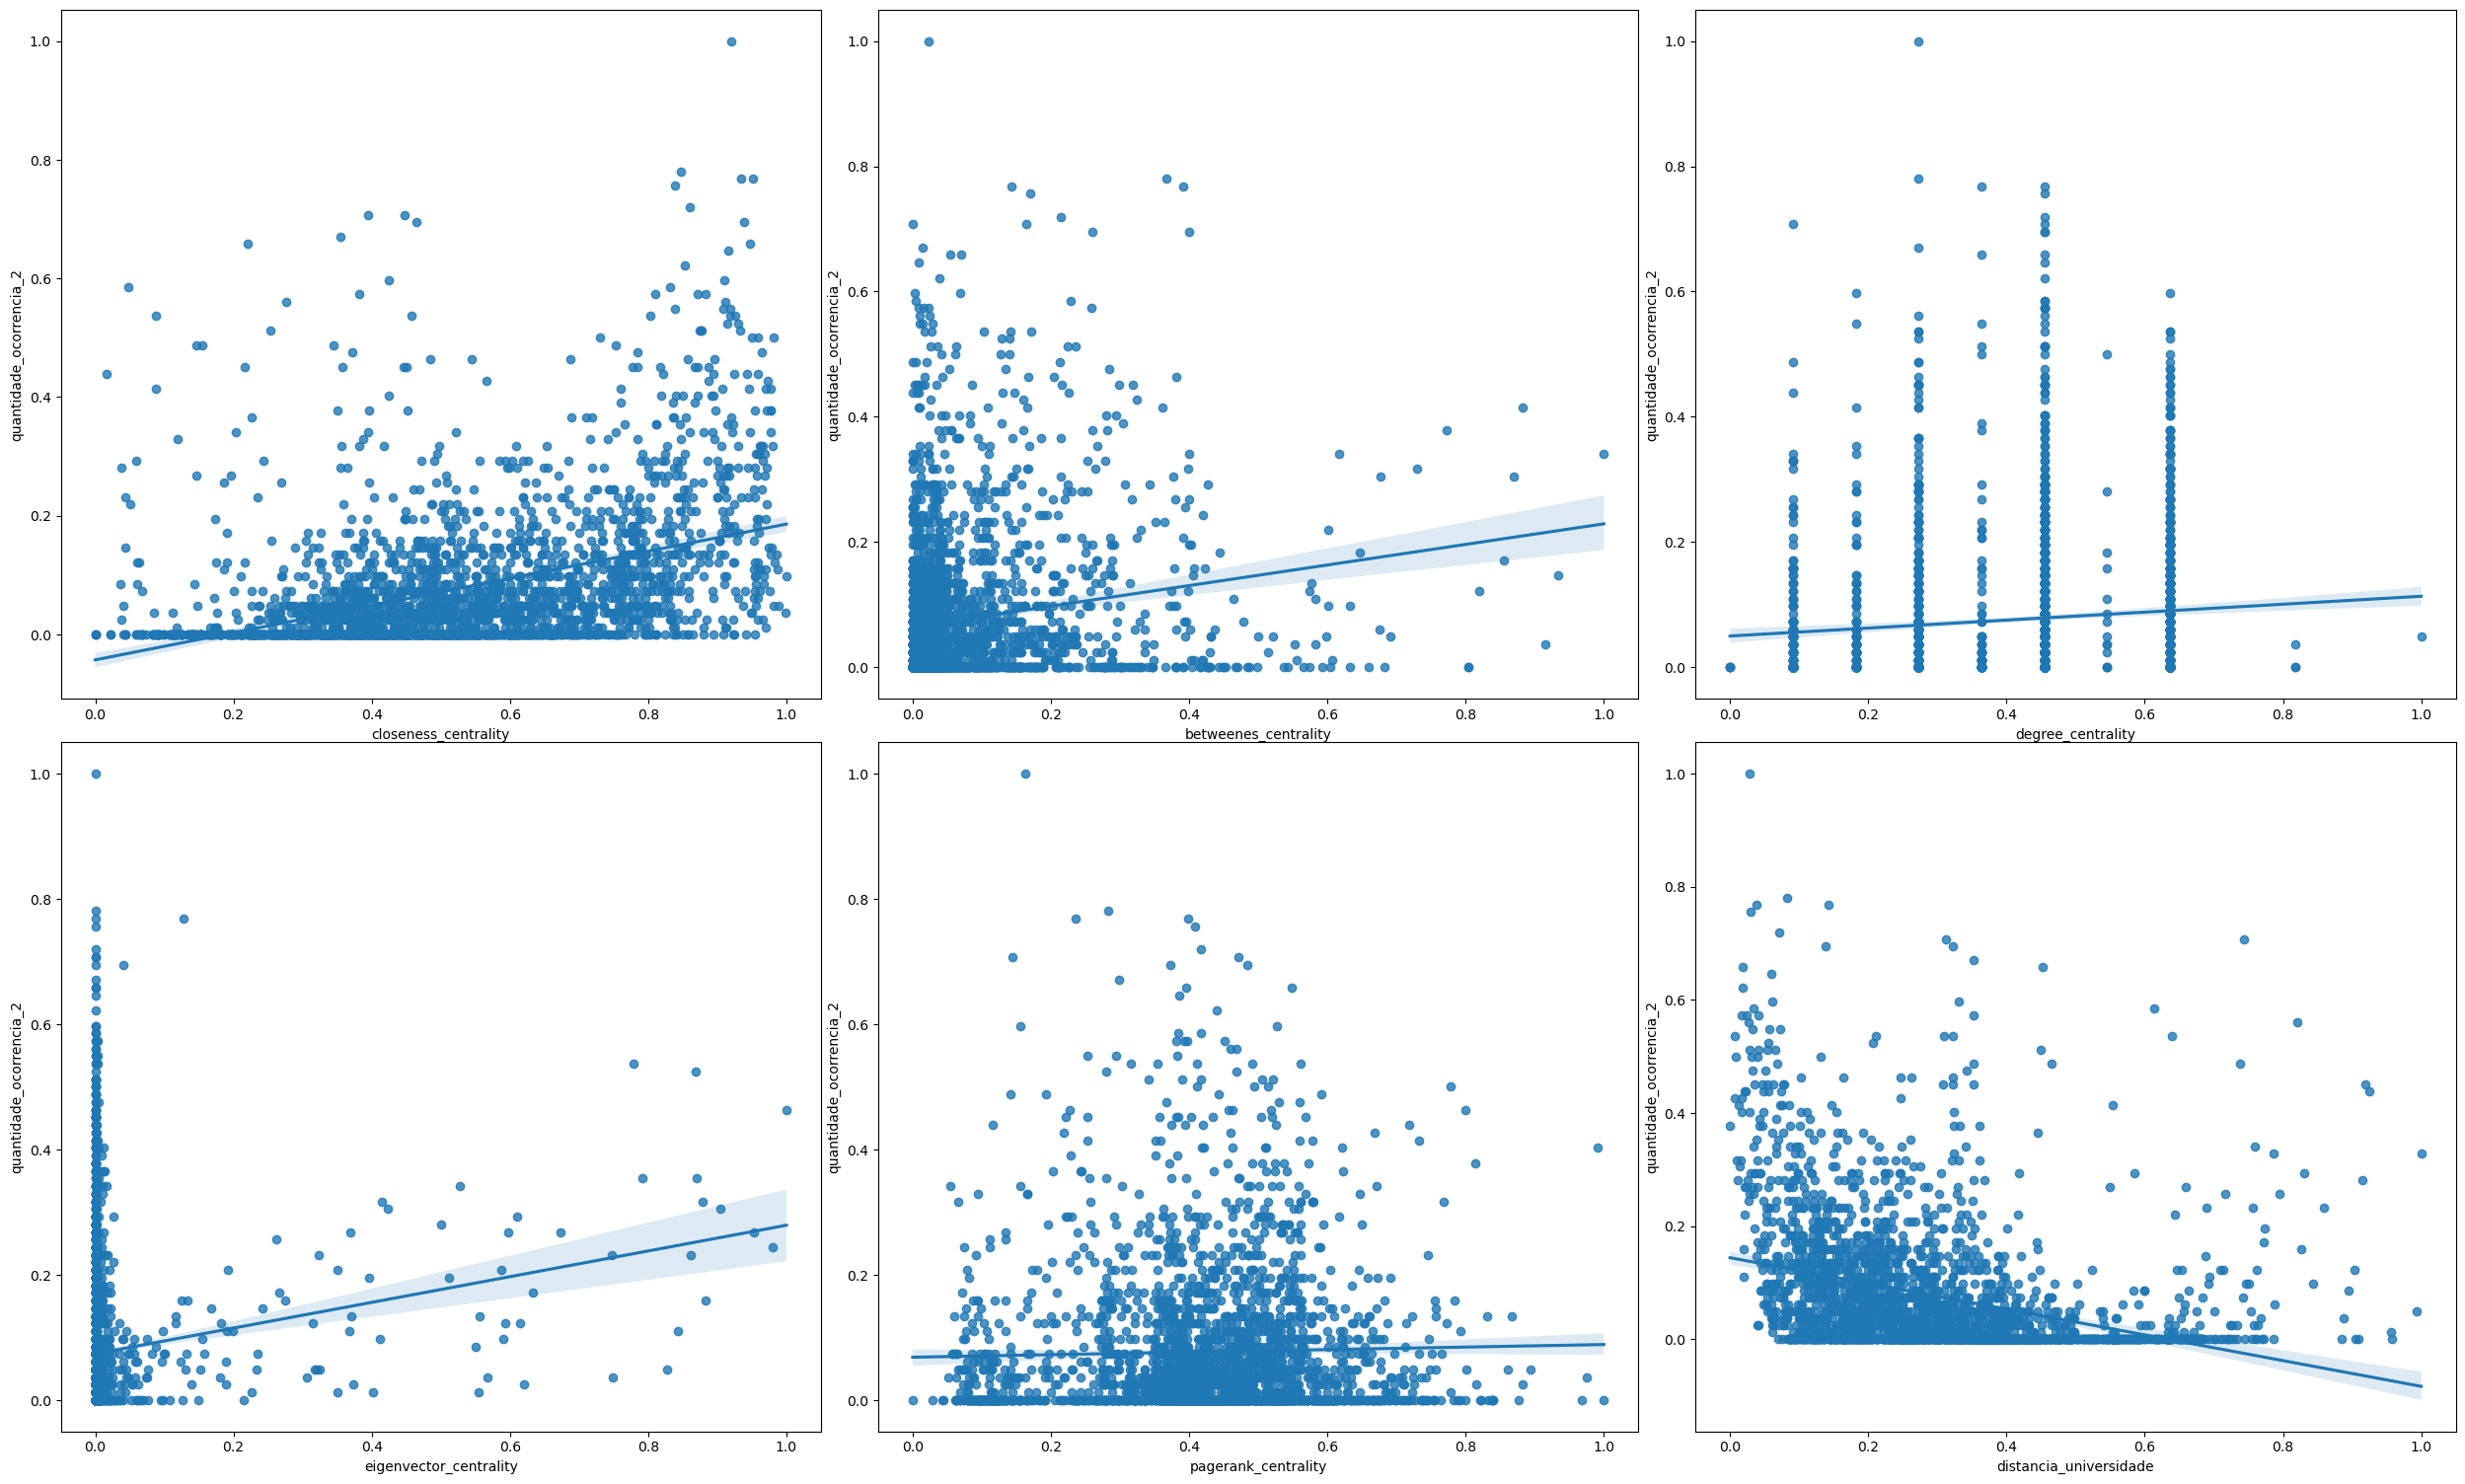

In [50]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

dadoscalculados = pd.read_csv(caminho_medidas)
dadossemoutliers = dadoscalculados[dadoscalculados['closeness_centrality'] >= 0.02]

scaler = MinMaxScaler()
dadosnormalizedarray = scaler.fit_transform(dadossemoutliers)
colunas = ['closeness_centrality', 'betweenes_centrality', 'degree_centrality', 'eigenvector_centrality', 'pagerank_centrality', 'quantiade_ocorrencia', 'distancia_universidade', 'quantidade_ocorrencia_2']
dadosnormalizedsemoutlier = pd.DataFrame(dadosnormalizedarray, columns = colunas)

janela, graficos = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
plt.tight_layout()

sns.regplot(data=dadosnormalizedsemoutlier, x="closeness_centrality", y="quantidade_ocorrencia_2", ax=graficos[0][0])
sns.regplot(data=dadosnormalizedsemoutlier, x="betweenes_centrality", y="quantidade_ocorrencia_2", ax=graficos[0][1])
sns.regplot(data=dadosnormalizedsemoutlier, x="degree_centrality", y="quantidade_ocorrencia_2", ax=graficos[0][2])
sns.regplot(data=dadosnormalizedsemoutlier, x="eigenvector_centrality", y="quantidade_ocorrencia_2", ax=graficos[1][0])
sns.regplot(data=dadosnormalizedsemoutlier, x="pagerank_centrality", y="quantidade_ocorrencia_2", ax=graficos[1][1])
sns.regplot(data=dadosnormalizedsemoutlier, x="distancia_universidade", y="quantidade_ocorrencia_2", ax=graficos[1][2])

In [53]:
print('pearson = ' + str(dadosnormalizedsemoutlier['closeness_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'])))
print('spearman = ' + str(dadosnormalizedsemoutlier['closeness_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="spearman")))
print('kendall = ' + str(dadosnormalizedsemoutlier['closeness_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="kendall")))
print()
print('betweenes pearson = ' + str(dadosnormalizedsemoutlier['betweenes_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'])))
print('betweenes spearman = ' + str(dadosnormalizedsemoutlier['betweenes_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="spearman")))
print('betweenes kendall = ' + str(dadosnormalizedsemoutlier['betweenes_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="kendall")))
print()
print('degree pearson = ' + str(dadosnormalizedsemoutlier['degree_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'])))
print('degree spearman = ' + str(dadosnormalizedsemoutlier['degree_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="spearman")))
print('degree kendall = ' + str(dadosnormalizedsemoutlier['degree_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="kendall")))
print()
print('eigenvector pearson = ' + str(dadosnormalizedsemoutlier['eigenvector_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'])))
print('eigenvector spearman = ' + str(dadosnormalizedsemoutlier['eigenvector_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="spearman")))
print('eigenvector kendall = ' + str(dadosnormalizedsemoutlier['eigenvector_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="kendall")))
print()
print('pagerank pearson = ' + str(dadosnormalizedsemoutlier['pagerank_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'])))
print('pagerank spearman = ' + str(dadosnormalizedsemoutlier['pagerank_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="spearman")))
print('pagerank kendall = ' + str(dadosnormalizedsemoutlier['pagerank_centrality'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="kendall")))
print()
print('distancia universidade pearson = ' + str(dadosnormalizedsemoutlier['distancia_universidade'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'])))
print('distancia universidade spearman = ' + str(dadosnormalizedsemoutlier['distancia_universidade'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="spearman")))
print('distancia universidade kendall = ' + str(dadosnormalizedsemoutlier['distancia_universidade'].corr(dadosnormalizedsemoutlier['quantidade_ocorrencia_2'], method="kendall")))

pearson = 0.4198647650745199
spearman = 0.4861422786154293
kendall = 0.36208554580477137

betweenes pearson = 0.16355066434785684
betweenes spearman = 0.21351601812908902
betweenes kendall = 0.15461284953465268

degree pearson = 0.08577890067899699
degree spearman = 0.14408546840750314
degree kendall = 0.11589237042039141

eigenvector pearson = 0.14880907067154708
eigenvector spearman = 0.2987501796608545
eigenvector kendall = 0.21434549722095791

pagerank pearson = 0.026060733083585114
pagerank spearman = 0.04699889653756687
pagerank kendall = 0.03389369901864788

distancia universidade pearson = -0.3212326715731153
distancia universidade spearman = -0.47296959385400783
distancia universidade kendall = -0.352135928230164


In [38]:
#normalizacao dos dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dadosnormalizedarray = scaler.fit_transform(dadoscalculados)
colunas = ['closeness_centrality', 'betweenes_centrality', 'degree_centrality', 'eigenvector_centrality', 'pagerank_centrality', 'quantiade_ocorrencia', 'distancia_universidade', 'quantidade_ocorrencia_2']
dadosnormalized = pd.DataFrame(dadosnormalizedarray, columns = colunas)

dadosnormalized.describe(include='all')

,closeness_centrality,betweenes_centrality,degree_centrality,eigenvector_centrality,pagerank_centrality,quantiade_ocorrencia,distancia_universidade,quantidade_ocorrencia_2
count,2693.000000,2693.000000,2693.000000,2.693000e+03,2693.000000,2693.000000,2693.000000,2693.000000
mean,0.757632,0.072232,0.420248,1.463934e-02,0.474952,0.041886,0.296446,0.076621
std,0.112962,0.117114,0.159788,8.527216e-02,0.137814,0.094499,0.166322,0.117649
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.680731,0.007450,0.272727,1.136642e-07,0.416886,0.000000,0.172567,0.000000
50%,0.748404,0.023935,0.454545,3.760394e-06,0.480590,0.000000,0.276806,0.036585
75%,0.838158,0.086058,0.454545,2.276387e-04,0.559923,0.066667,0.387008,0.097561
max,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000


In [39]:
#salvando arquivos normalizados em csv

dadosnormalized.to_csv(caminho_medidas_refinadas, index=False)

<Axes: xlabel='distancia_universidade', ylabel='Count'>

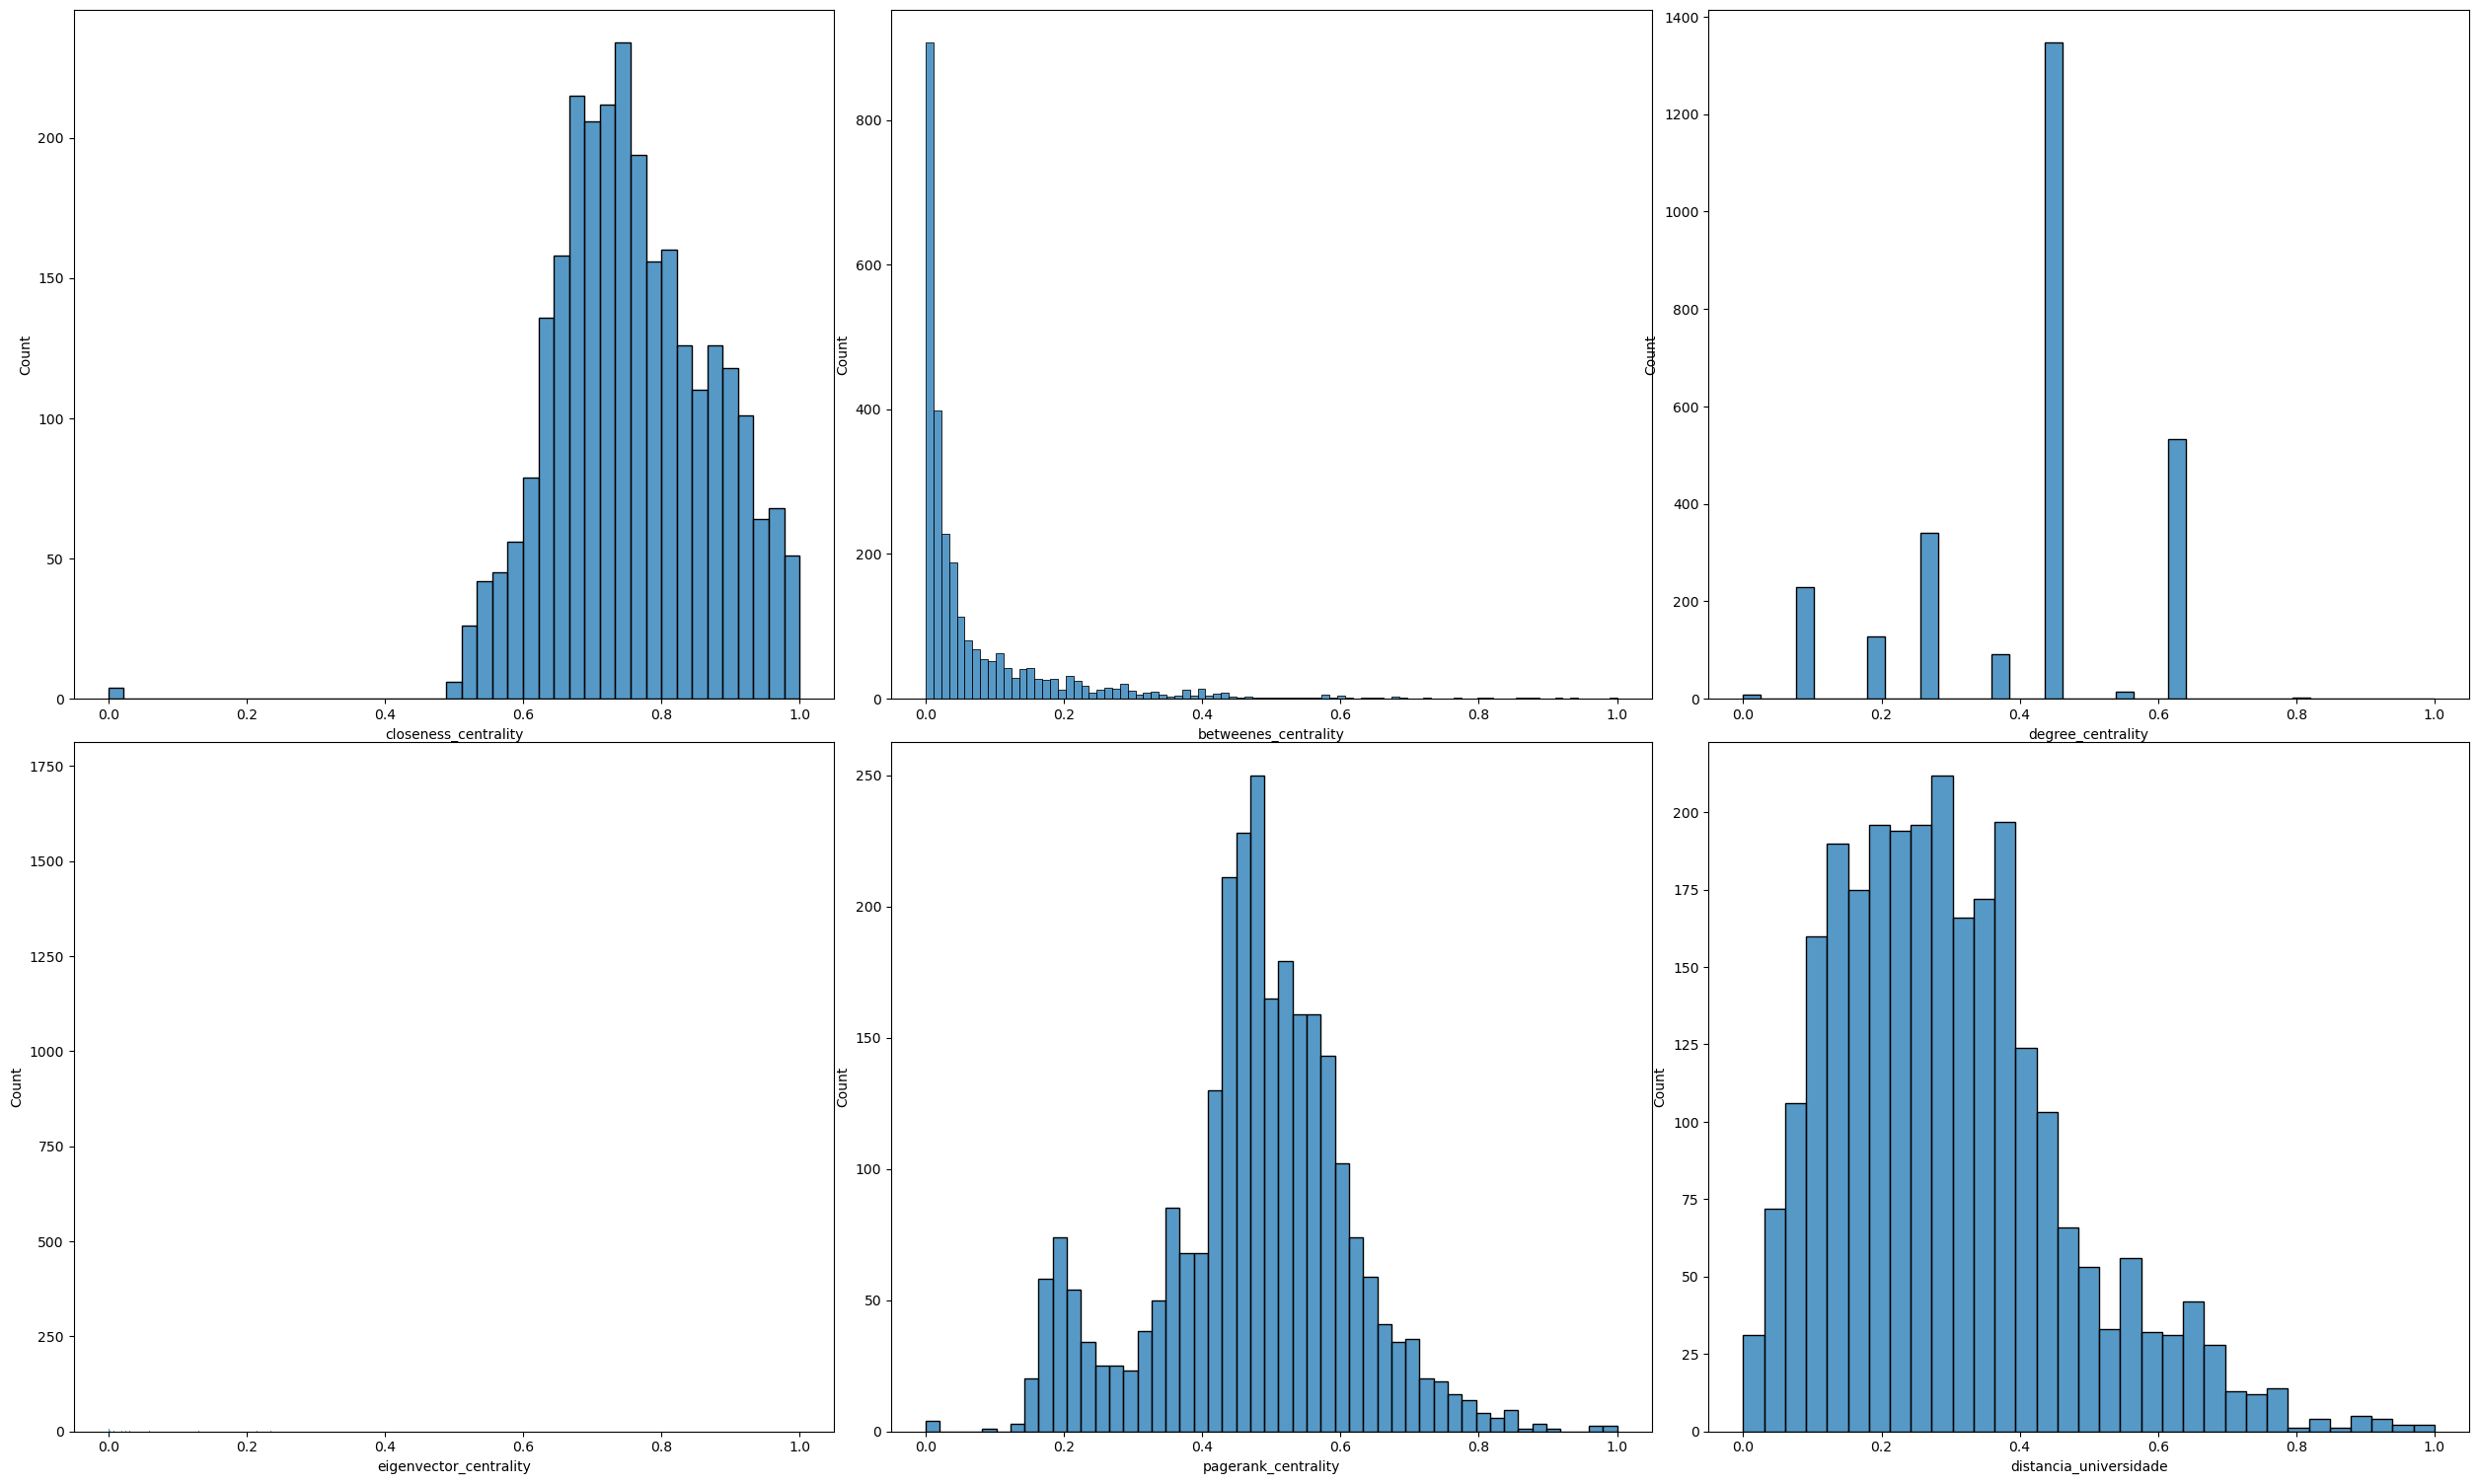

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns

janela, graficos = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
plt.tight_layout()

sns.histplot(dadosnormalized, x="closeness_centrality", ax=graficos[0][0])
sns.histplot(dadosnormalized, x="betweenes_centrality", ax=graficos[0][1])
sns.histplot(dadosnormalized, x="degree_centrality", ax=graficos[0][2])
sns.histplot(dadosnormalized, x="eigenvector_centrality", ax=graficos[1][0])
sns.histplot(dadosnormalized, x="pagerank_centrality", ax=graficos[1][1])
sns.histplot(dadosnormalized, x="distancia_universidade", ax=graficos[1][2])

<Axes: xlabel='distancia_universidade', ylabel='quantidade_ocorrencia_2'>

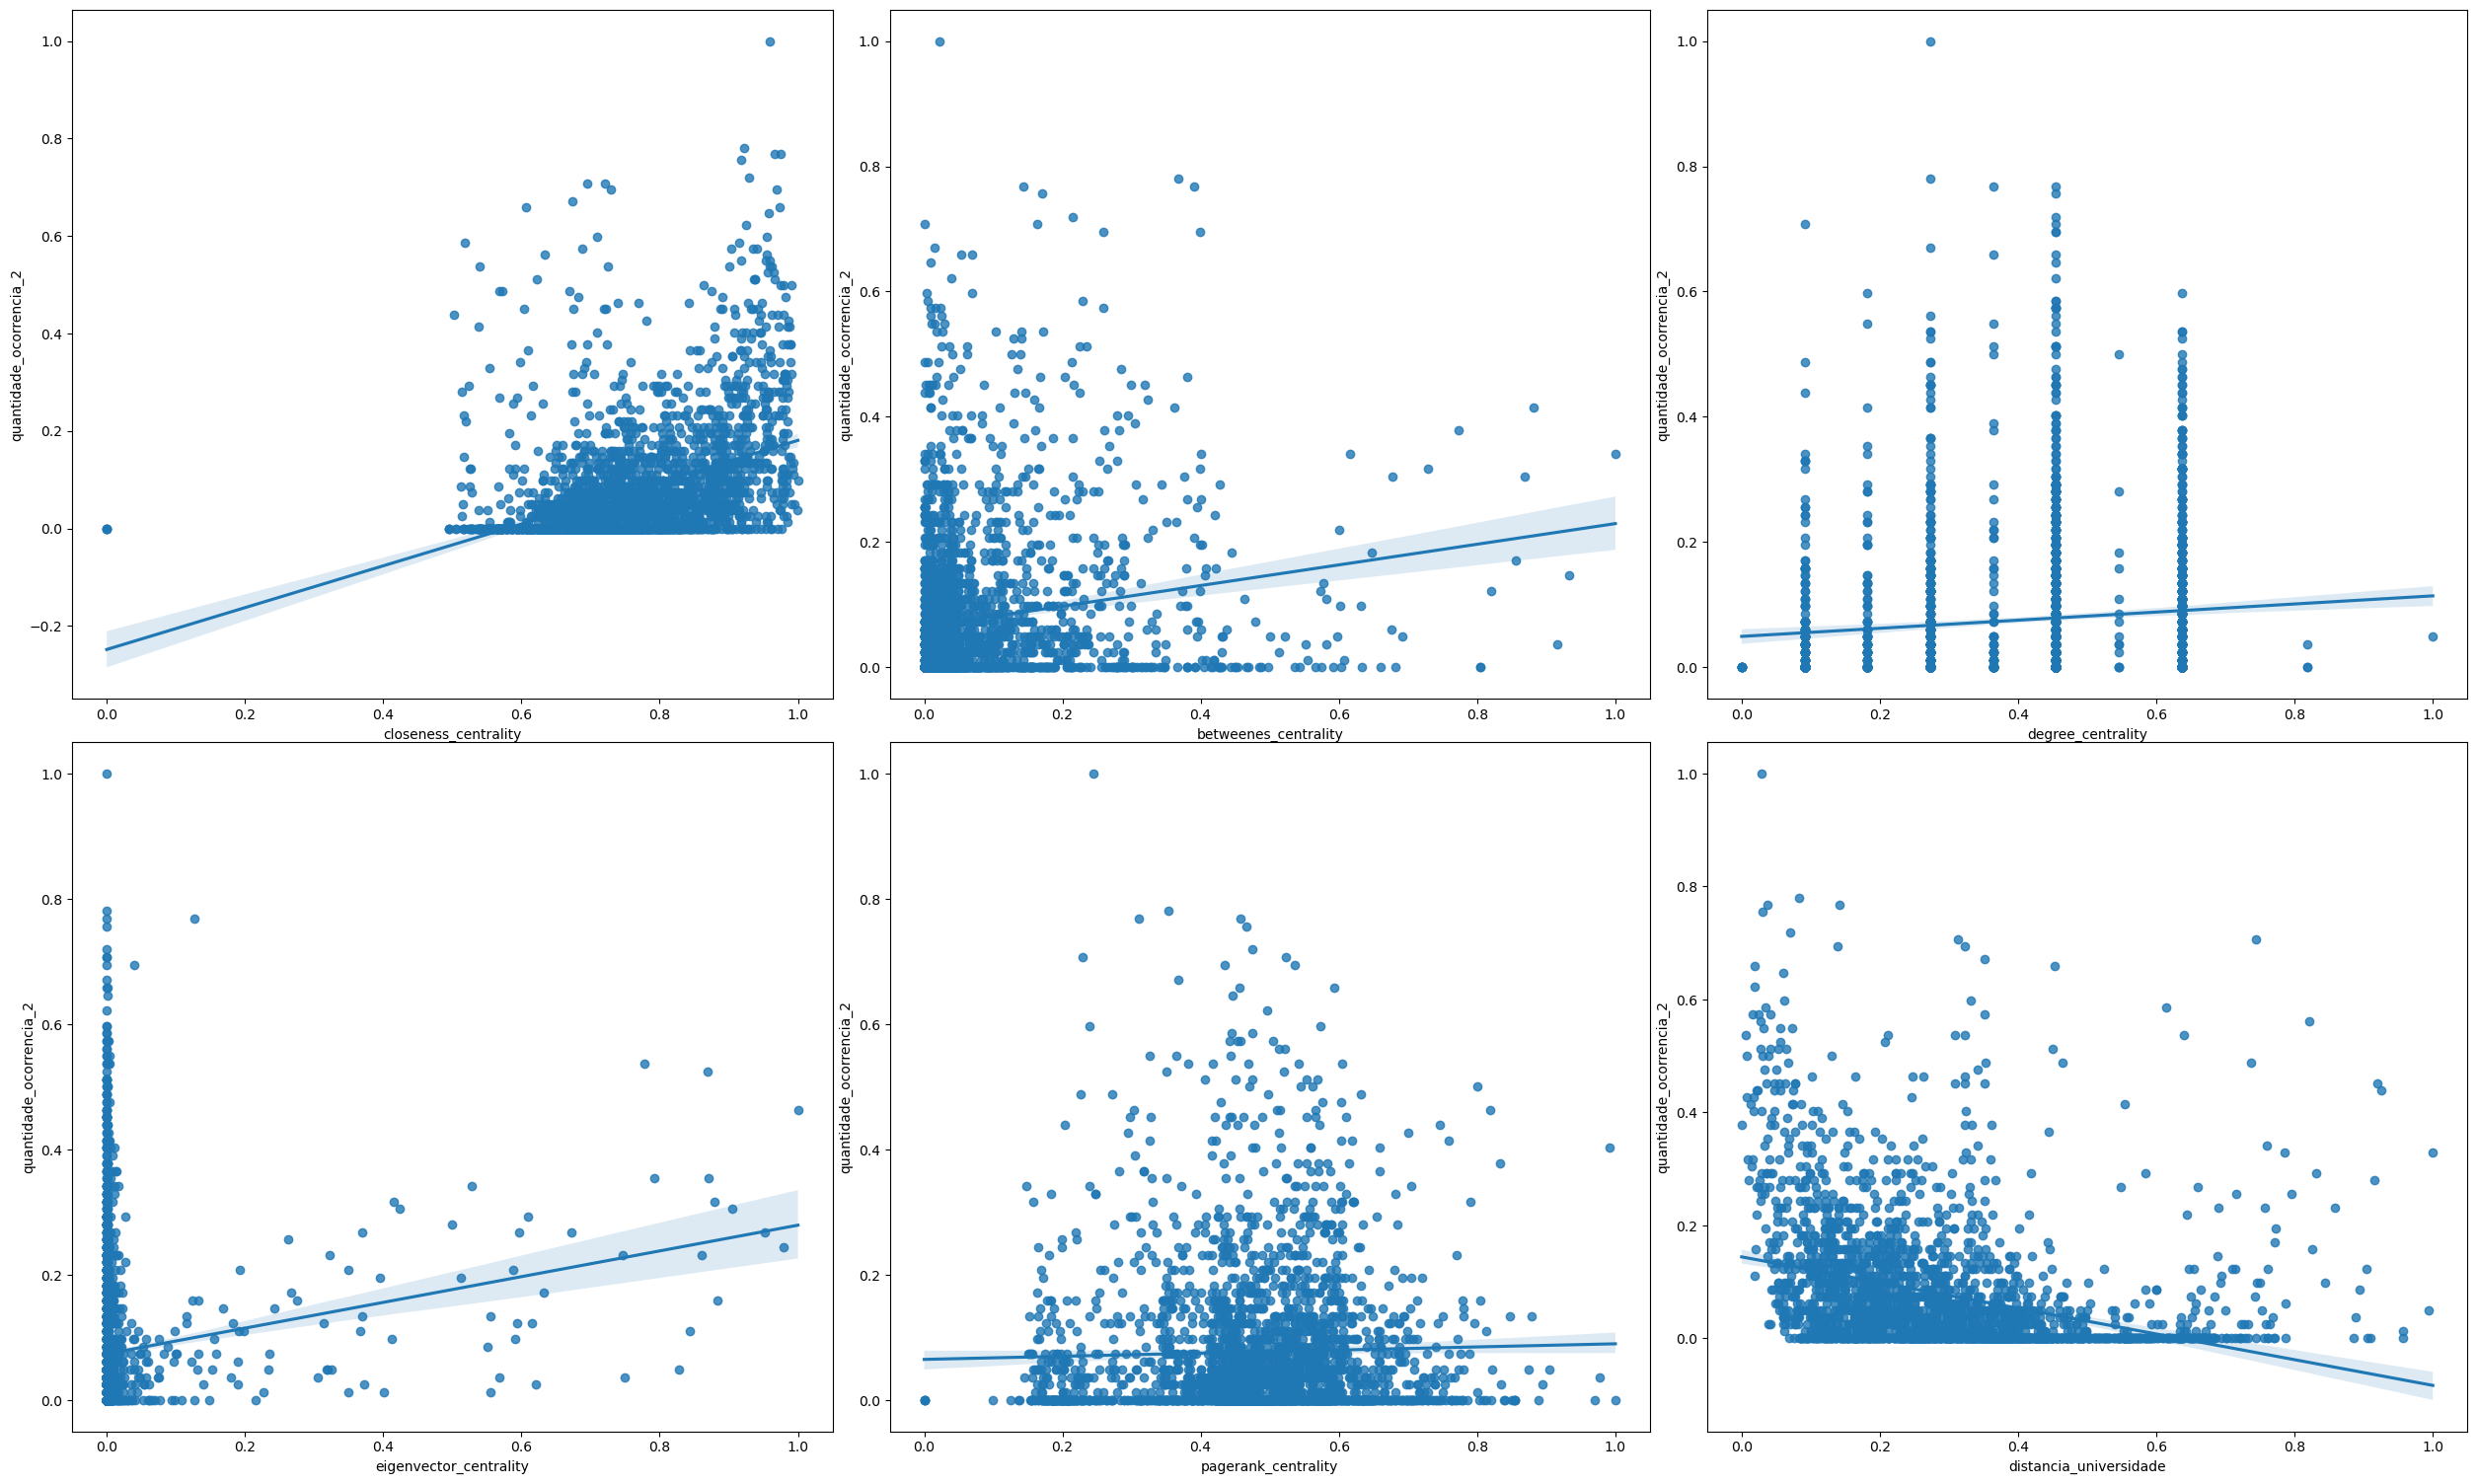

In [41]:
from matplotlib import pyplot as plt
from seaborn_qqplot import pplot

janela, graficos = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
plt.tight_layout()

sns.regplot(data=dadosnormalized, x="closeness_centrality", y="quantidade_ocorrencia_2", ax=graficos[0][0])
sns.regplot(data=dadosnormalized, x="betweenes_centrality", y="quantidade_ocorrencia_2", ax=graficos[0][1])
sns.regplot(data=dadosnormalized, x="degree_centrality", y="quantidade_ocorrencia_2", ax=graficos[0][2])
sns.regplot(data=dadosnormalized, x="eigenvector_centrality", y="quantidade_ocorrencia_2", ax=graficos[1][0])
sns.regplot(data=dadosnormalized, x="pagerank_centrality", y="quantidade_ocorrencia_2", ax=graficos[1][1])
sns.regplot(data=dadosnormalized, x="distancia_universidade", y="quantidade_ocorrencia_2", ax=graficos[1][2])

In [42]:
print('pearson = ' + str(dadosnormalized['closeness_centrality'].corr(dadosnormalized['quantidade_ocorrencia_2'])))
print('spearman = ' + str(dadosnormalized['closeness_centrality'].corr(dadosnormalized['quantidade_ocorrencia_2'], method="spearman")))
print('kendall = ' + str(dadosnormalized['closeness_centrality'].corr(dadosnormalized['quantidade_ocorrencia_2'], method="kendall")))

pearson = 0.41194059424970275
spearman = 0.4874236393222222
kendall = 0.36314318603810225


In [43]:
sem_outliers_closeness = dadosnormalized[(dadosnormalized['closeness_centrality'] > 0.4)]
sem_outliers_closeness

,closeness_centrality,betweenes_centrality,degree_centrality,eigenvector_centrality,pagerank_centrality,quantiade_ocorrencia,distancia_universidade,quantidade_ocorrencia_2
0,0.909291,0.288577,0.272727,1.035198e-06,0.457631,0.066667,0.126441,0.170732
1,0.894683,0.376614,0.272727,3.155174e-07,0.426169,0.333333,0.147499,0.304878
2,0.841475,0.142913,0.272727,1.392472e-08,0.388247,0.000000,0.201771,0.097561
3,0.947295,0.008720,0.272727,2.782194e-04,0.393626,0.133333,0.066870,0.329268
4,0.945421,0.279625,0.454545,1.191289e-05,0.991626,0.200000,0.102565,0.402439
...,...,...,...,...,...,...,...,...
2688,0.728979,0.031059,0.181818,1.448508e-04,0.348485,0.000000,0.353244,0.024390
2689,0.691574,0.039951,0.181818,1.167079e-04,0.265396,0.000000,0.354346,0.000000
2690,0.676473,0.038897,0.181818,5.682096e-06,0.349330,0.000000,0.353568,0.000000
2691,0.745742,0.039434,0.363636,7.536372e-05,0.329948,0.000000,0.458946,0.000000


<Axes: xlabel='distancia_universidade', ylabel='quantidade_ocorrencia_2'>

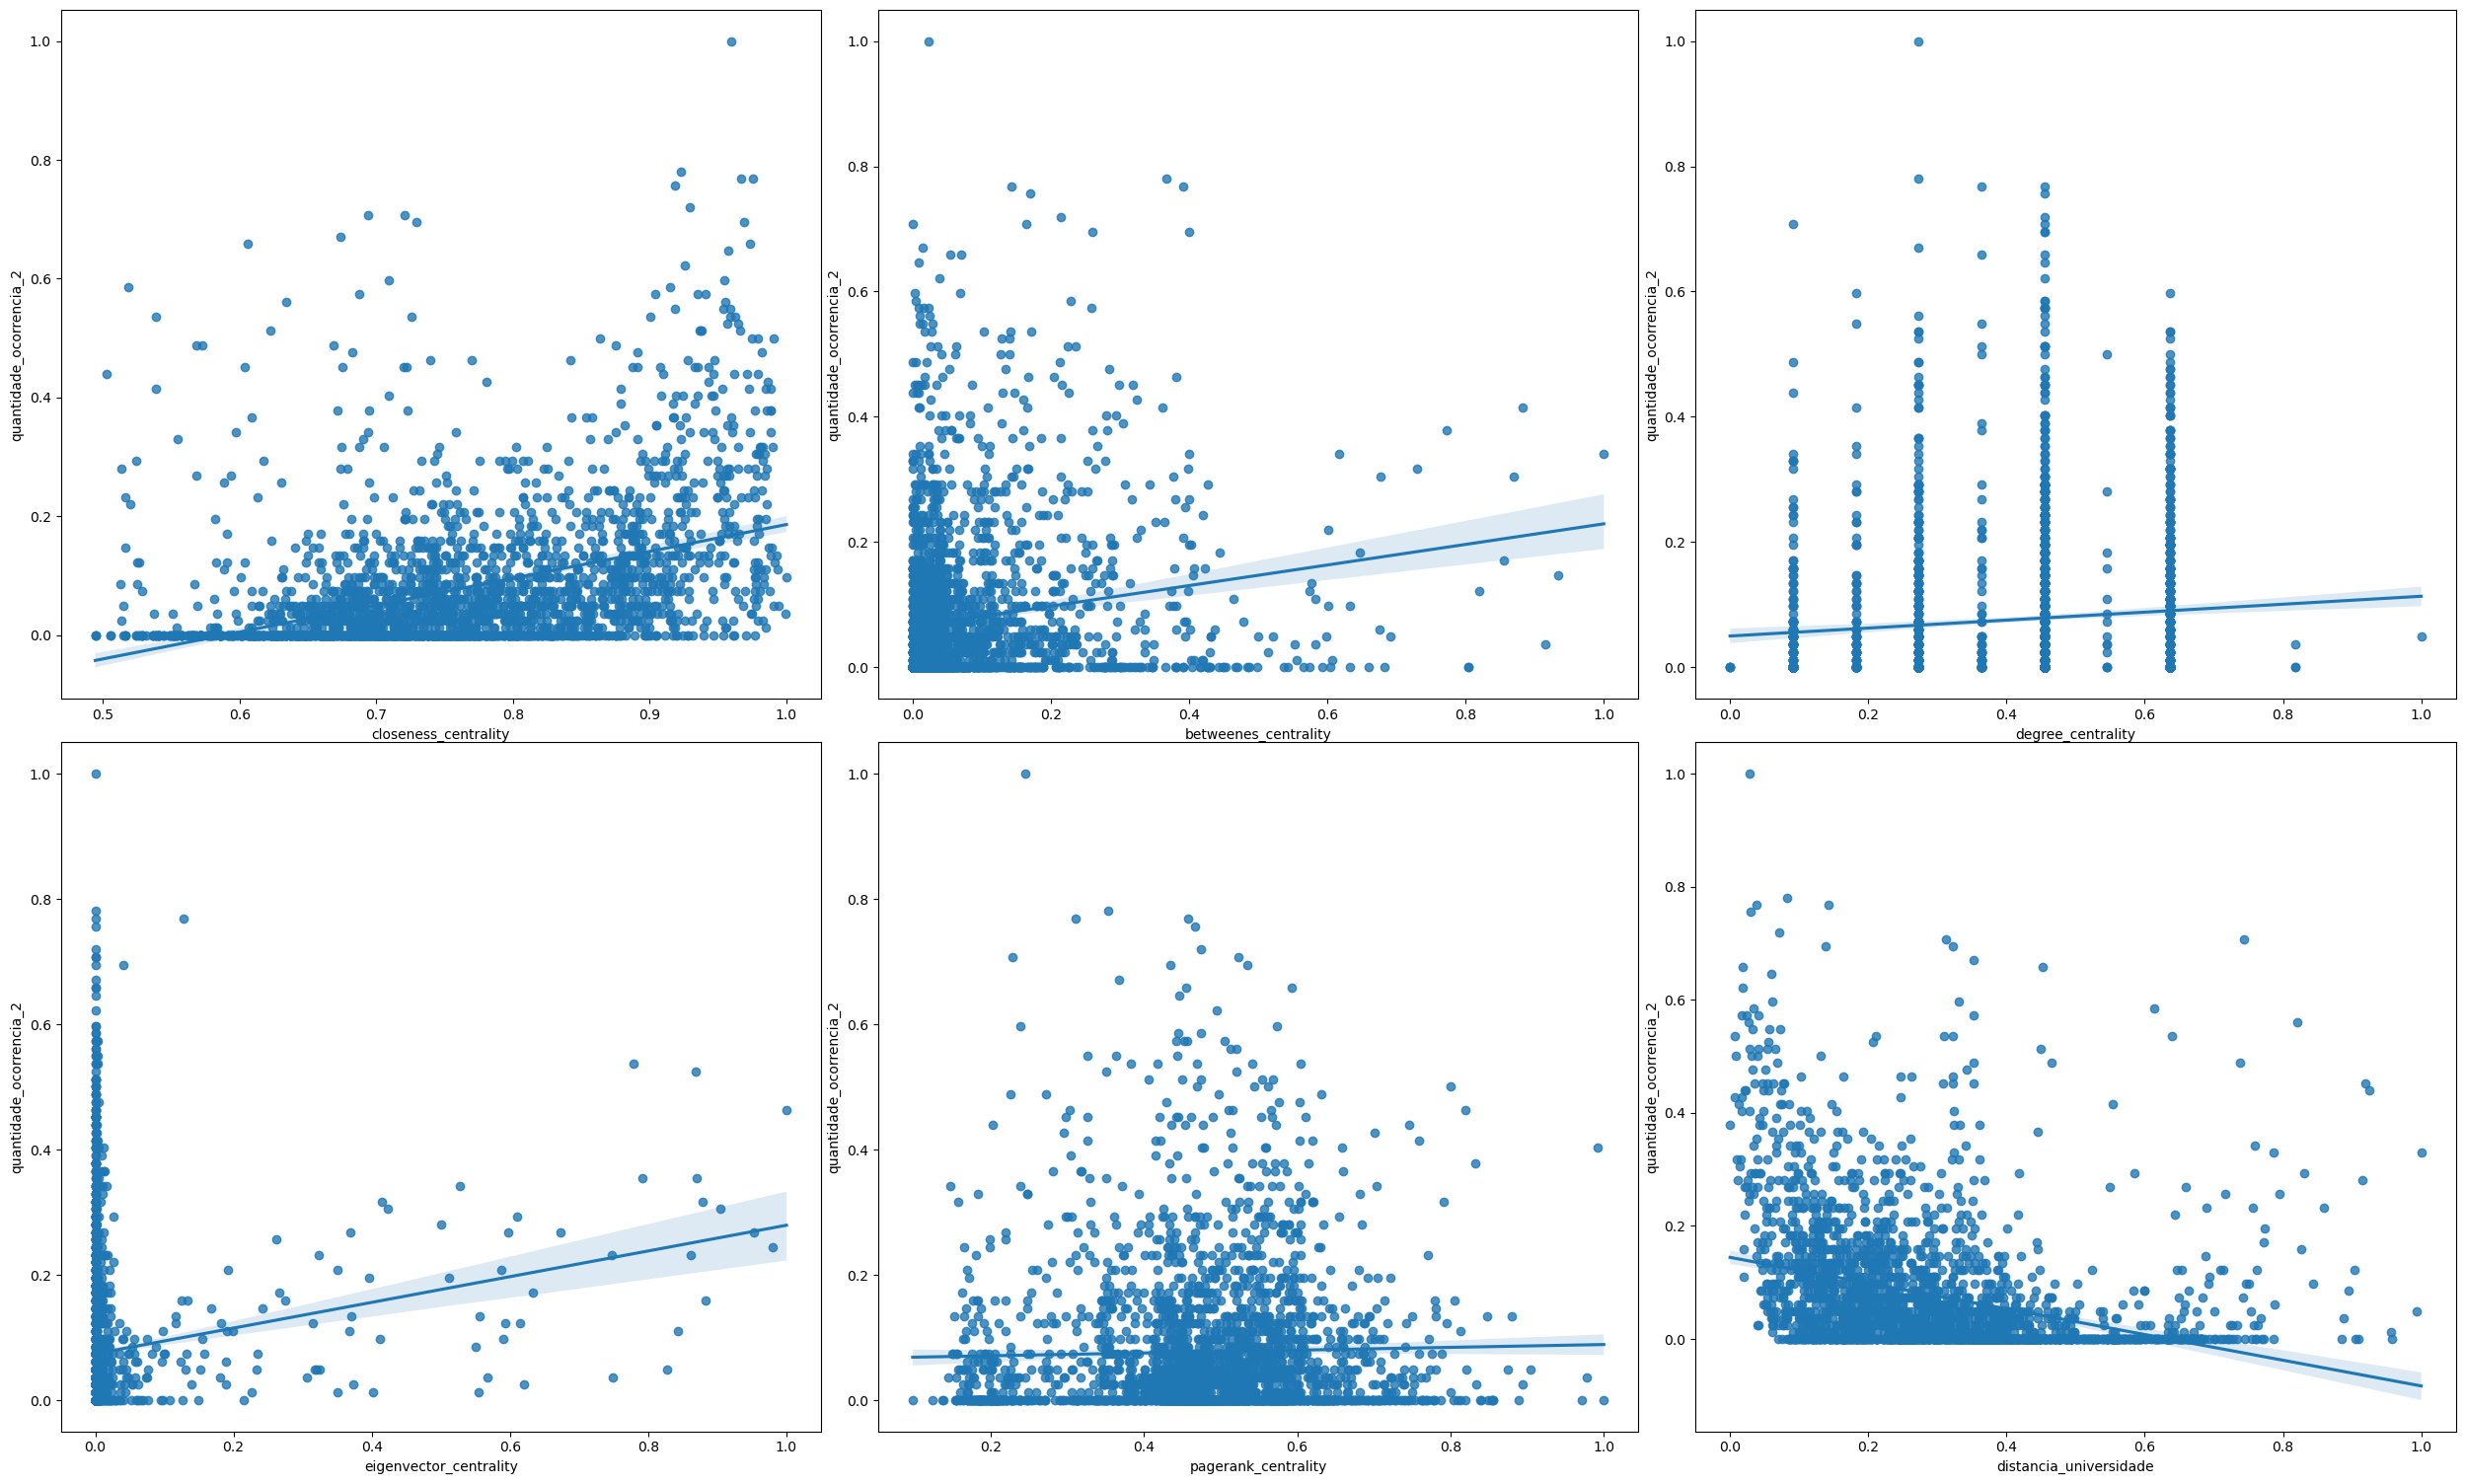

In [44]:
janela, graficos = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
plt.tight_layout()

sns.regplot(data=sem_outliers_closeness, x="closeness_centrality", y="quantidade_ocorrencia_2", ax=graficos[0][0])
sns.regplot(data=sem_outliers_closeness, x="betweenes_centrality", y="quantidade_ocorrencia_2", ax=graficos[0][1])
sns.regplot(data=sem_outliers_closeness, x="degree_centrality", y="quantidade_ocorrencia_2", ax=graficos[0][2])
sns.regplot(data=sem_outliers_closeness, x="eigenvector_centrality", y="quantidade_ocorrencia_2", ax=graficos[1][0])
sns.regplot(data=sem_outliers_closeness, x="pagerank_centrality", y="quantidade_ocorrencia_2", ax=graficos[1][1])
sns.regplot(data=sem_outliers_closeness, x="distancia_universidade", y="quantidade_ocorrencia_2", ax=graficos[1][2])

In [45]:
print('pearson = ' + str(sem_outliers_closeness['closeness_centrality'].corr(sem_outliers_closeness['quantidade_ocorrencia_2'])))
print('spearman = ' + str(sem_outliers_closeness['closeness_centrality'].corr(sem_outliers_closeness['quantidade_ocorrencia_2'], method="spearman")))
print('kendall = ' + str(sem_outliers_closeness['closeness_centrality'].corr(sem_outliers_closeness['quantidade_ocorrencia_2'], method="kendall")))

pearson = 0.41986476507452
spearman = 0.4861422786154293
kendall = 0.36208554580477137


In [22]:
#calculando a quantidade de ocorrências registradas em cada cruzamento da cidade - utilizando a segunda estratégia
# GRAFO OCORRENCIAS - segunda estratégia

import osmnx as ox
import networkx as nx
import pandas as pd
import haversine as hs

G = ox.load_graphml(caminho_arquivos_cidade + '\\' + cidade + '.graphml')
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='old_index')

df = pd.read_csv(caminho_dados_policia)
dadoscalculados = pd.read_csv(caminho_medidas)
nr_nodes = nx.number_of_nodes(G)

ocorrencias = {i: 0 for i in range(nr_nodes)}

for index, row in df.iterrows():
    max_dist_1 = float('inf')
    max_dist_2 = float('inf')
    max_dist_3 = float('inf')
    max_dist_4 = float('inf')

    cruzamento_selecionado_1 = None;
    cruzamento_selecionado_2 = None;
    cruzamento_selecionado_3 = None;
    cruzamento_selecionado_4 = None;
    local_ocorrencia = (row['Latitude'], row['Longitude'])
    
    for u, data in G.nodes(data=True):
        local_cruzamento = (data['y'], data['x'])
        dist = hs.haversine(local_ocorrencia, local_cruzamento, unit=hs.Unit.METERS)
        
        if(dist < max_dist_1):
            max_dist_4 = max_dist_3
            cruzamento_selecionado_4 = cruzamento_selecionado_3
            
            max_dist_3 = max_dist_2
            cruzamento_selecionado_3 = cruzamento_selecionado_2
            
            max_dist_2 = max_dist_1
            cruzamento_selecionado_2 = cruzamento_selecionado_1
            
            max_dist_1 = dist
            cruzamento_selecionado_1 = u
            
        elif(dist < max_dist_2):
            max_dist_4 = max_dist_3
            cruzamento_selecionado_4 = cruzamento_selecionado_3
            
            max_dist_3 = max_dist_2
            cruzamento_selecionado_3 = cruzamento_selecionado_2
            
            max_dist_2 = dist
            cruzamento_selecionado_2 = u
            
        elif(dist < max_dist_3):
            max_dist_4 = max_dist_3
            cruzamento_selecionado_4 = cruzamento_selecionado_3
            
            max_dist_3 = dist
            cruzamento_selecionado_3 = u
        
        elif(dist < max_dist_4):
            max_dist_4 = dist
            cruzamento_selecionado_4 = u
    
    if cruzamento_selecionado_1 is not None:
        ocorrencias[cruzamento_selecionado_1] += 1
    
    if cruzamento_selecionado_2 is not None:
        ocorrencias[cruzamento_selecionado_2] += .75
        
    if cruzamento_selecionado_3 is not None:
        ocorrencias[cruzamento_selecionado_3] += .5
        
    if cruzamento_selecionado_4 is not None:
        ocorrencias[cruzamento_selecionado_4] += .25

dadoscalculados['quantidade_ocorrencia_2'] = ocorrencias.values()
dadoscalculados.to_csv(caminho_medidas, index=False);

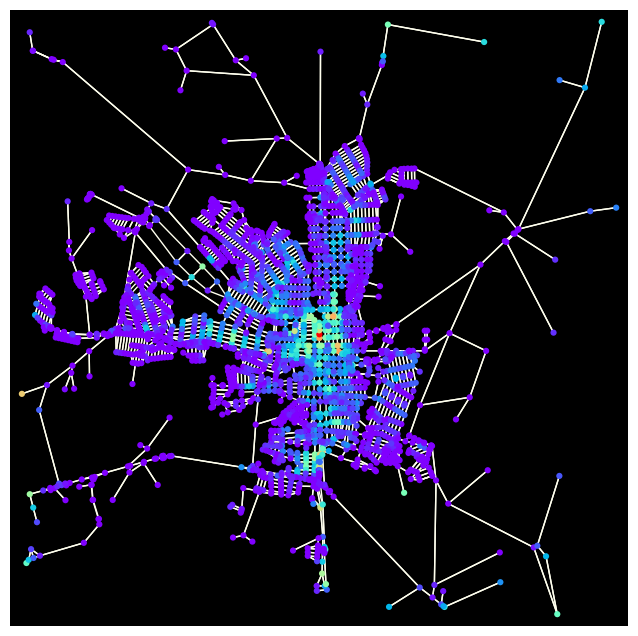

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [35]:
nx.set_node_attributes(G, ocorrencias, name="nr_ocorrencias_2")    
cores_ocorrencias_2 = ox.plot.get_node_colors_by_attr(G, "nr_ocorrencias_2", cmap="rainbow")

for u, v, data in G.edges.data():
    data.clear()

ox.plot.plot_graph(
   G, bgcolor="k", node_color=cores_ocorrencias_2, node_size=20, edge_linewidth=1, edge_color="#ffffee"
)